In [2]:
import pandas as pd
import collections
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("data/e2e-dataset/trainset.csv")

In [25]:
# Report Statistics about food values
all_food_values = []
for index, row in df.iterrows():
    mr = row[0].lower()
    mr_parts = mr.split(",")
    for mr_part in mr_parts:
        mr_part = mr_part.strip("]")
        current_mr = mr_part.split("[")[0].strip()
        if current_mr == "food":
            all_food_values.append(mr_part.split("[")[1])

ctr = collections.Counter(all_food_values)
print("Frequency of the elements in the List : ",ctr)

Frequency of the elements in the List :  Counter({'italian': 82, 'fast food': 80, 'french': 79, 'english': 78, 'indian': 77, 'japanese': 76, 'chinese': 74})


In [21]:
# Check how many of the sentences in the training set end with a dot
shape = df.shape
print("The shape of the dataframe is: ", shape)

correct_ending = 0
for index, row in df.iterrows():
    utt = row[1]
    if utt[-1] == ",":
        utt = utt[:-1]+"."
    elif utt[-1] == "!":
        utt = utt[:-1]+"."
    elif utt[-1] == " ":
        utt = utt[:-1]+"."
    elif utt[-1] in "0123456789abcdefghijklmnopqrstuvwxyzéABCDEFGHIJKLMNOPQRSTUVWXYZ'":
        utt += "."
    
    if utt[-1] == ".":
        correct_ending += 1
    else:
        print(utt)
        
print(correct_ending)

The shape of the dataframe is:  (42061, 2)
42061


In [13]:
df.shape

(42061, 2)

In [68]:
all_mrs = []
is_eatType = []
is_priceRange = []
is_customer_rating = []
is_near = []
is_food = []
is_area = []
is_family_friendly = []

for index, row in df[:5].iterrows():
    mr = row["mr"]
    mr_parts = mr.split(",")
    
    entry_mrs = []
    for mr_part in mr_parts:
        print(mr_part)
        current_mr = mr_part.split("[")[0].strip()
        entry_mrs.append(current_mr)
    print(entry_mrs)
    if "eatType" in entry_mrs:
        is_eatType.append(1)
    else:
        is_eatType.append(0)
    
    if "priceRange" in entry_mrs:
        is_priceRange.append(1)
    else:
        is_priceRange.append(0)
    
    if "customer rating" in entry_mrs:
        is_customer_rating.append(1)
    else:
        is_customer_rating.append(0)
    
    if "near" in entry_mrs:
        is_near.append(1)
    else:
        is_near.append(0)
    
    if "food" in entry_mrs:
        is_food.append(1)
    else:
        is_food.append(0)
    
    if "area" in entry_mrs:
        is_area.append(1)
    else:
        is_area.append(0)
    
    if "familyFriendly" in entry_mrs:
        is_family_friendly.append(1)
    else:
        is_family_friendly.append(0)

    
        all_mrs += entry_mrs
        

name[The Vaults]
 eatType[pub]
 priceRange[more than £30]
 customer rating[5 out of 5]
 near[Café Adriatic]
['name', 'eatType', 'priceRange', 'customer rating', 'near']
name[The Cambridge Blue]
 eatType[pub]
 food[English]
 priceRange[cheap]
 near[Café Brazil]
['name', 'eatType', 'food', 'priceRange', 'near']
name[The Eagle]
 eatType[coffee shop]
 food[Japanese]
 priceRange[less than £20]
 customer rating[low]
 area[riverside]
 familyFriendly[yes]
 near[Burger King]
['name', 'eatType', 'food', 'priceRange', 'customer rating', 'area', 'familyFriendly', 'near']
name[The Mill]
 eatType[coffee shop]
 food[French]
 priceRange[£20-25]
 area[riverside]
 near[The Sorrento]
['name', 'eatType', 'food', 'priceRange', 'area', 'near']
name[Loch Fyne]
 food[French]
 customer rating[high]
 area[riverside]
 near[The Rice Boat]
['name', 'food', 'customer rating', 'area', 'near']


In [61]:
ctr = collections.Counter(all_mrs)

In [65]:
df['is_eatType'] = is_eatType
df['is_priceRange'] = is_priceRange
df['is_customer_rating'] = is_customer_rating
df['is_area'] = is_area
df['is_familyFriendly'] = is_family_friendly
df['is_food'] = is_food
df['is_near'] = is_near


In [66]:
df.corr()

,is_eatType,is_priceRange,is_customer_rating,is_area,is_familyFriendly,is_food,is_near
is_eatType,1.000000,-0.051235,-0.026165,-0.041255,-0.014223,-0.101600,-0.027407
is_priceRange,-0.051235,1.000000,-0.054166,0.032583,-0.035882,-0.126841,0.019997
is_customer_rating,-0.026165,-0.054166,1.000000,0.030013,-0.040965,-0.054079,-0.004285
is_area,-0.041255,0.032583,0.030013,1.000000,0.012218,0.019675,-0.010174
is_familyFriendly,-0.014223,-0.035882,-0.040965,0.012218,1.000000,0.013303,-0.005758
is_food,-0.101600,-0.126841,-0.054079,0.019675,0.013303,1.000000,-0.012995
is_near,-0.027407,0.019997,-0.004285,-0.010174,-0.005758,-0.012995,1.000000


In [35]:
ctr

Counter({'name': 42061,
         ' eatType': 20111,
         ' priceRange': 29127,
         ' customer rating': 28090,
         ' near': 20546,
         ' food': 35126,
         ' area': 24716,
         ' familyFriendly': 26295})

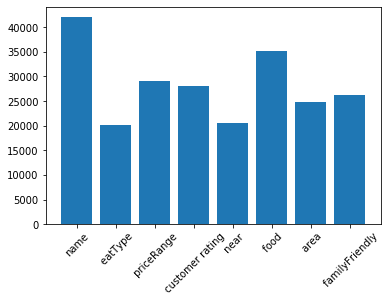

In [36]:
fig, ax = plt.subplots()
ax.bar(ctr.keys(), ctr.values())

plt.xticks(rotation=45)
